In [1]:
# Imports here | some to be used later
import numpy as np
import os
import json
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# load the json file and verify contents
with open('./data/starwars-episode-4-interactions-allCharacters.json') as f:
    data = json.load(f)

print(data['nodes'][0])
print(data['links'][0])

{'name': 'R2-D2', 'value': 40, 'colour': '#bde0f6'}
{'source': 1, 'target': 0, 'value': 3}


In [3]:
# Generate an undirected graph
sw_ep4_graph = nx.Graph()

#build graph nodes
for node in data['nodes']:
    sw_ep4_graph.add_node(node['name'])
    
#build graph edges
for edge in data['links']:
    sw_ep4_graph.add_edge(data['nodes'][edge['source']]['name'], data['nodes'][edge['target']]['name'])

# remove the solo disconnected node
sw_ep4_graph.remove_node("GOLD FIVE")

# Print out to verify data
print("Nodes: {}".format(list(sw_ep4_graph)))
print("Number of Nodes: {}".format(sw_ep4_graph.number_of_nodes()))
print("Number of Edges: {}".format(sw_ep4_graph.number_of_edges()))

Nodes: ['R2-D2', 'CHEWBACCA', 'C-3PO', 'LUKE', 'DARTH VADER', 'CAMIE', 'BIGGS', 'LEIA', 'BERU', 'OWEN', 'OBI-WAN', 'MOTTI', 'TARKIN', 'HAN', 'GREEDO', 'JABBA', 'DODONNA', 'GOLD LEADER', 'WEDGE', 'RED LEADER', 'RED TEN']
Number of Nodes: 21
Number of Edges: 60


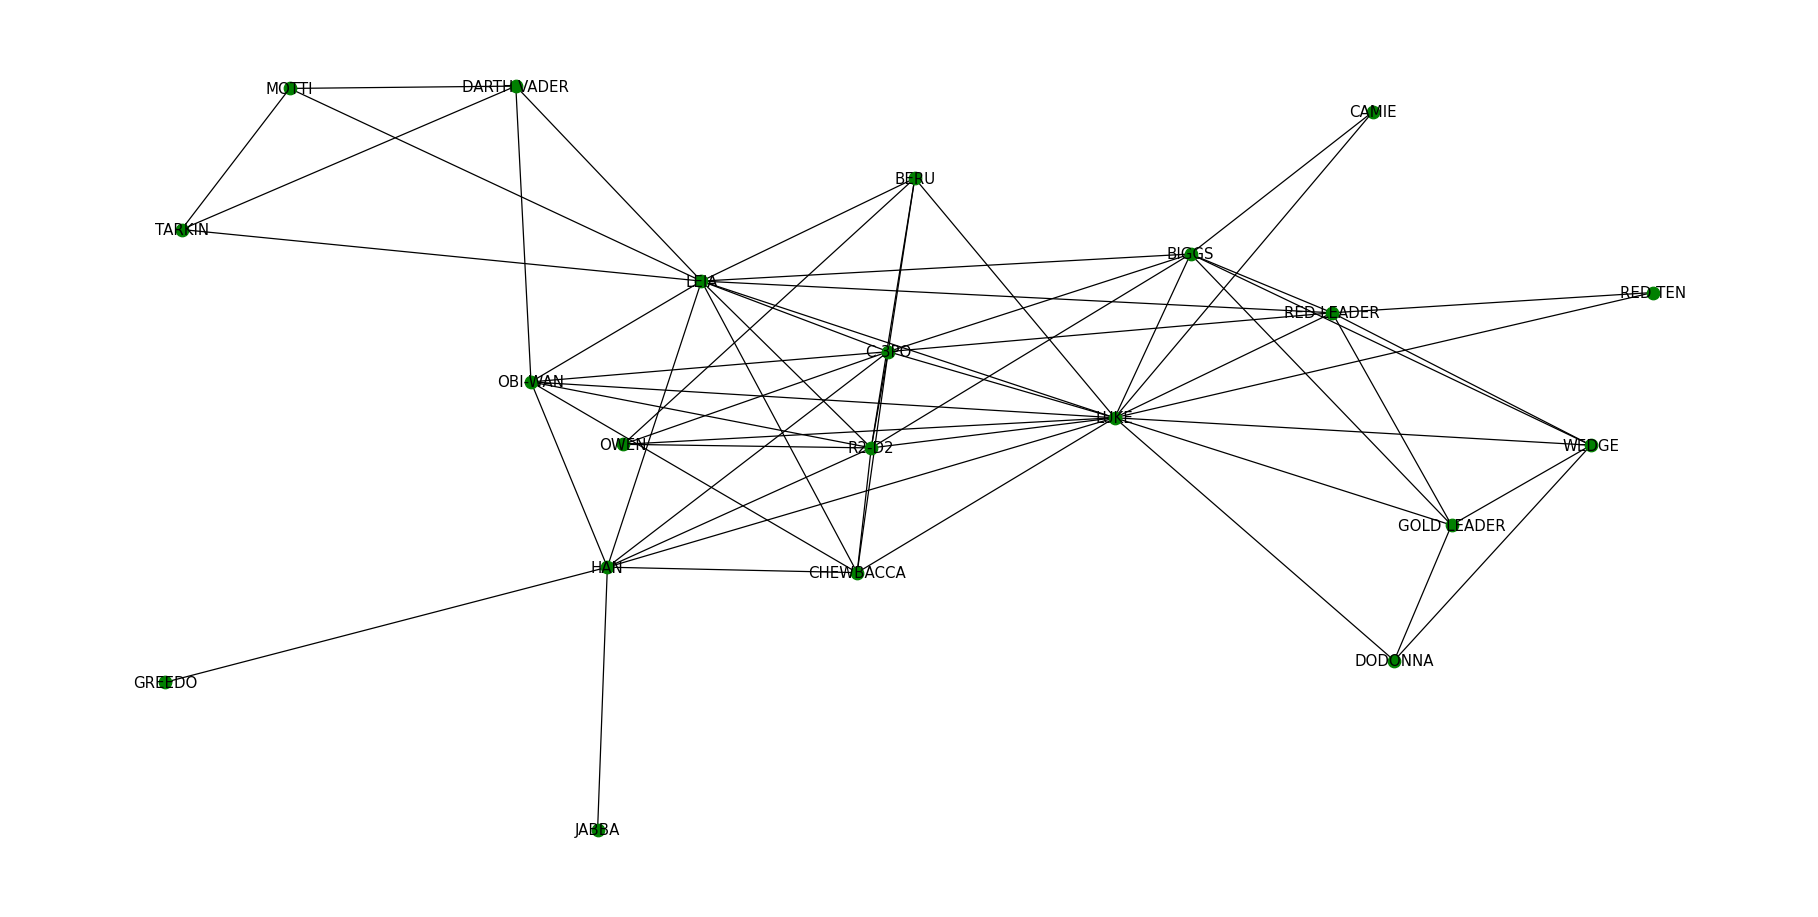

In [4]:
# Visualize the graph connections
options = {
    'node_color': 'green',
    'node_size': 100,
    'width': 1,
    'with_labels': True
}

fig = plt.figure(1, figsize=(20, 10), dpi=90)
nx.draw_kamada_kawai(sw_ep4_graph, **options)

In [5]:
"""
    Simple Graphing function for visualizing Degree and Ranks
"""
def BarGraphData(data: list, title: str, x_label: str, y_lable: str):
    x_val = [x[0] for x in data]
    y_val = [x[1] for x in data]

    # function to add value labels
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i,y[i],y[i])

    # Set the size
    plt.figure(figsize = (30, 15))
    plt.bar(x_val, y_val)
        
    # calling the function to add value labels
    addlabels(x_val, y_val)
        
    # giving title to the plot
    plt.title(title)

    # giving X and Y labels
    plt.xlabel(x_label)
    plt.ylabel(y_lable)
        
    # visualizing the plot
    plt.show()

15


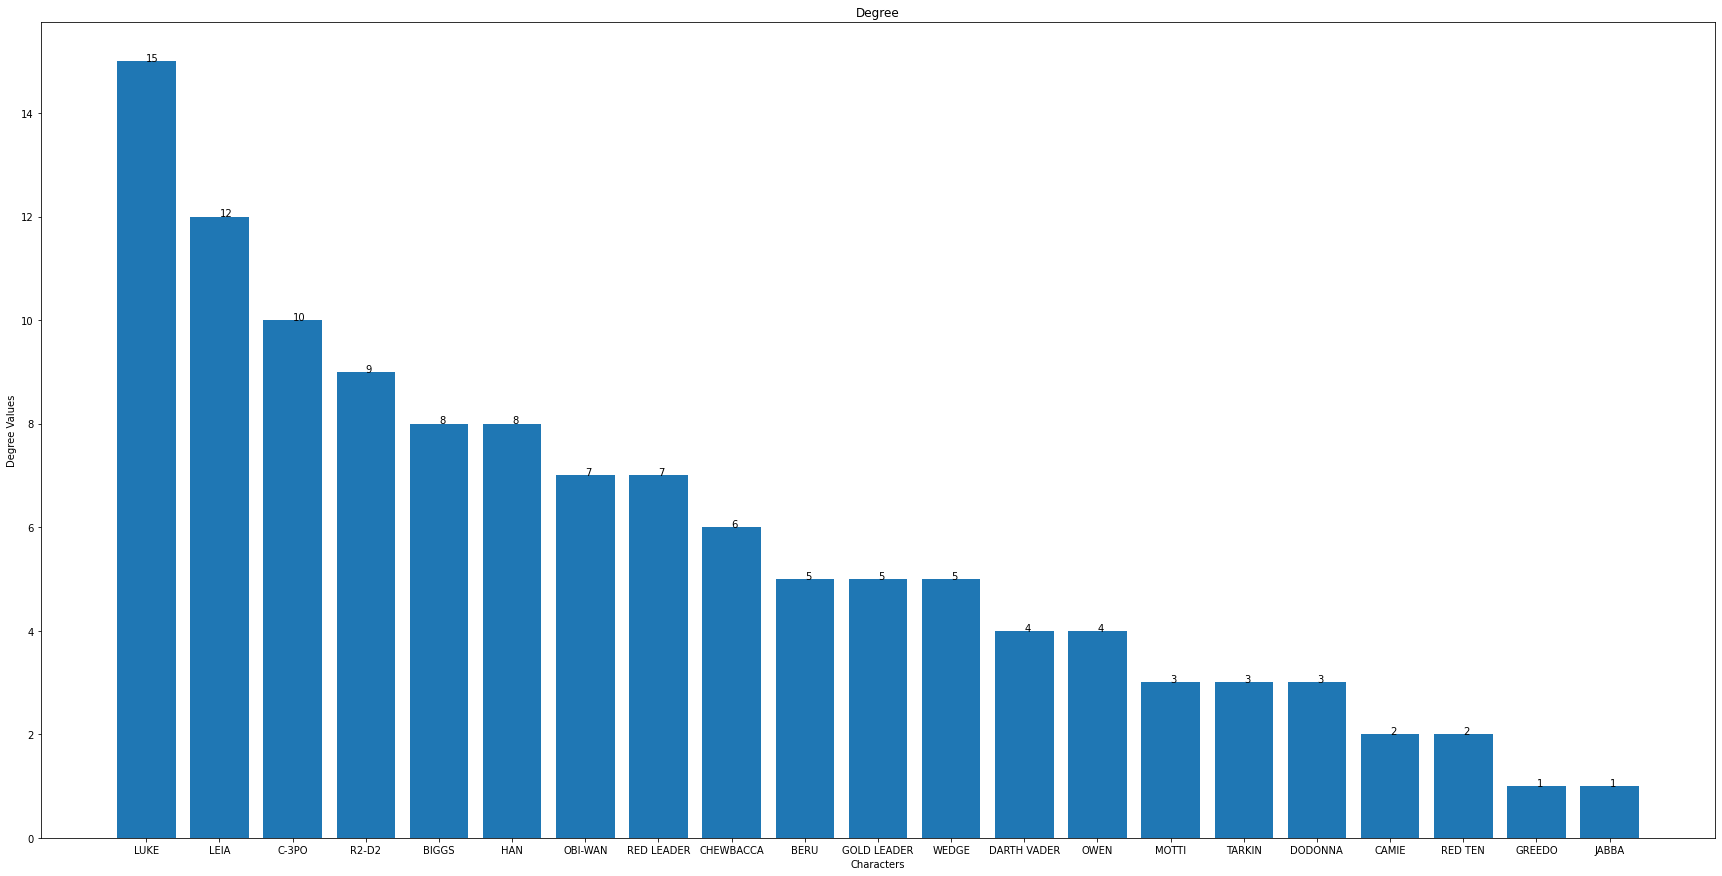

In [6]:
# Degree 
print(sw_ep4_graph.degree["LUKE"])
degree = sorted(sw_ep4_graph.degree, key=lambda x: x[1], reverse=True)

# Lets see it
BarGraphData(degree, "Degree", "Characters", "Degree Values")

0.11476827128400326


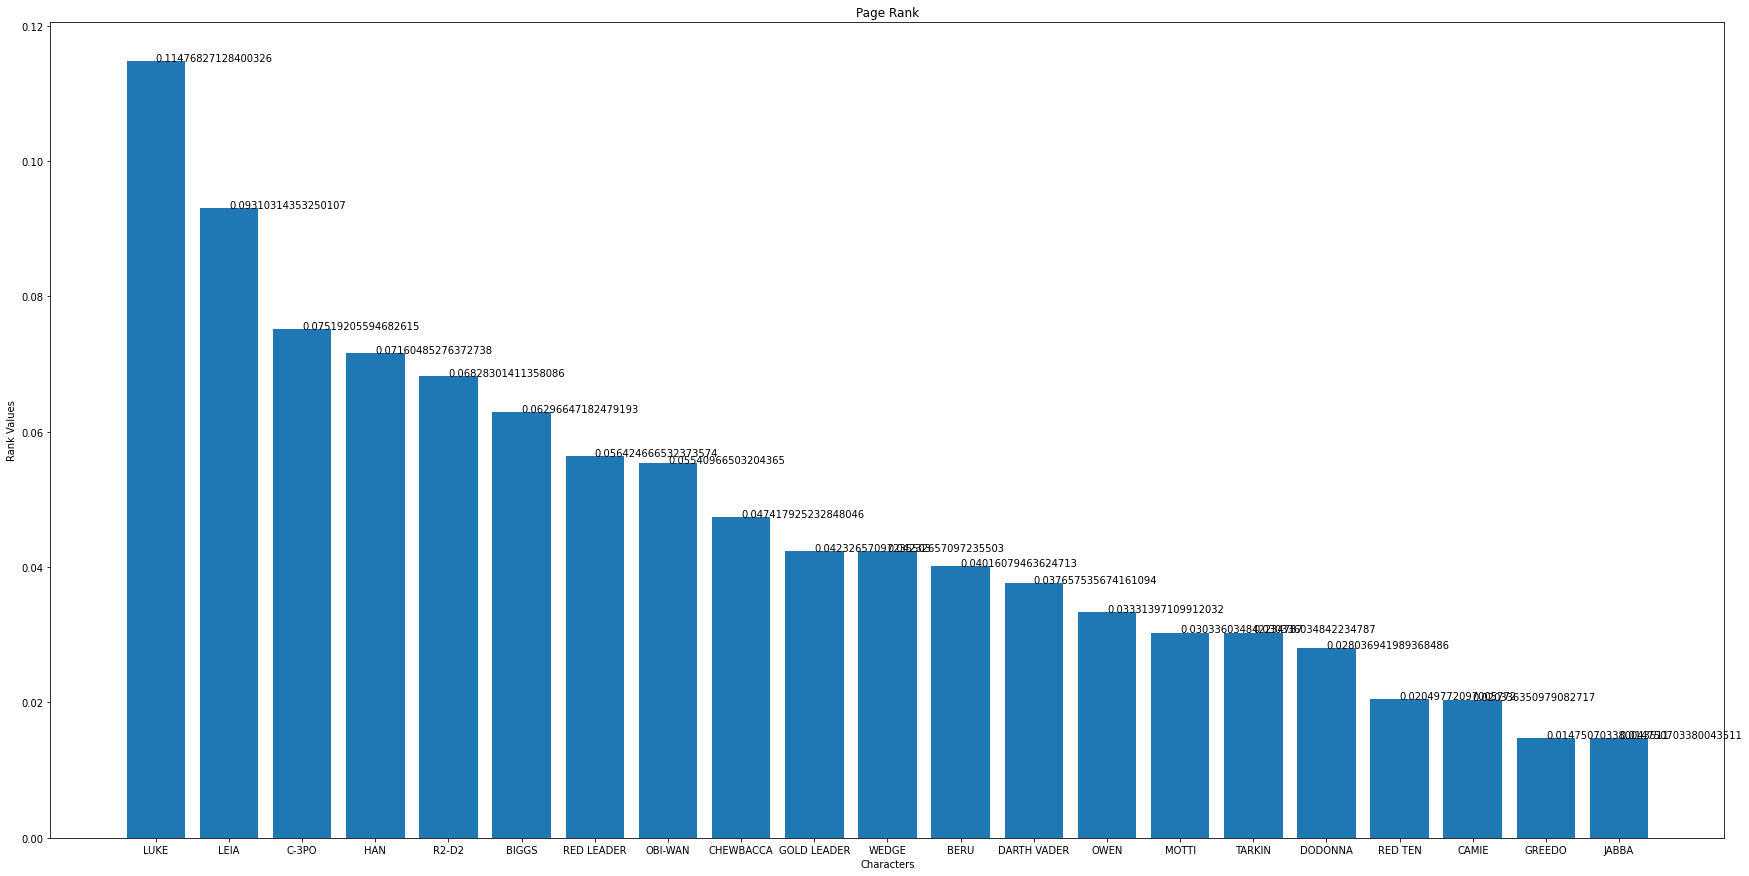

In [7]:
# Page Ranks
page_ranks = nx.pagerank(sw_ep4_graph) # A dictionary
print(page_ranks["LUKE"])
ranks = sorted(page_ranks.items(), key=lambda x: x[1], reverse=True)

# Lets see it
BarGraphData(ranks, "Page Rank", "Characters", "Rank Values")

### Hand Curated Faction groups

![title](img/graph_sw_ep4.png)

### Spectral Analysis

In [8]:
W = nx.adjacency_matrix(sw_ep4_graph)
print(W.todense())

[[0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0]
 [1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 0]
 [1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
 [0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


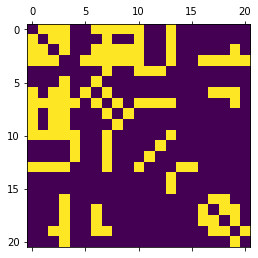

In [9]:
# Visualize the Adjacency Matrix
plt.matshow(W.todense())
plt.show()

In [10]:
# Adj Matrix is in char_list X char_list
char_list = list(sw_ep4_graph)
print(char_list[0:4])
print(char_list[6:11])

['R2-D2', 'CHEWBACCA', 'C-3PO', 'LUKE']
['BIGGS', 'LEIA', 'BERU', 'OWEN', 'OBI-WAN']


In [11]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)

degree matrix:
[[ 9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0

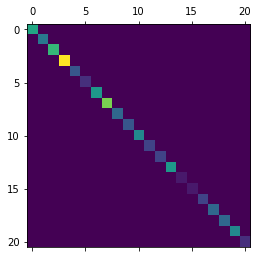

In [12]:
plt.matshow(D)
plt.show()

In [13]:
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

laplacian matrix:
[[ 9 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0  0 -1  0  0  0  0  0  0  0]
 [-1  6 -1 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0]
 [-1 -1 10 -1  0  0 -1 -1 -1 -1 -1  0  0 -1  0  0  0  0  0 -1  0]
 [-1 -1 -1 15  0 -1 -1 -1 -1 -1 -1  0  0 -1  0  0 -1 -1 -1 -1 -1]
 [ 0  0  0  0  4  0  0 -1  0  0 -1 -1 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0 -1  0  2 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [-1  0 -1 -1  0 -1  8 -1  0  0  0  0  0  0  0  0  0 -1 -1 -1  0]
 [-1 -1 -1 -1 -1  0 -1 12 -1  0 -1 -1 -1 -1  0  0  0  0  0 -1  0]
 [-1  0 -1 -1  0  0  0 -1  5 -1  0  0  0  0  0  0  0  0  0  0  0]
 [-1  0 -1 -1  0  0  0  0 -1  4  0  0  0  0  0  0  0  0  0  0  0]
 [-1 -1 -1 -1 -1  0  0 -1  0  0  7  0  0 -1  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0 -1  0  0  0  3 -1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 -1  0  0 -1  0  0  0 -1  3  0  0  0  0  0  0  0  0]
 [-1 -1 -1 -1  0  0  0 -1  0  0 -1  0  0  8 -1 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0  0  0  0

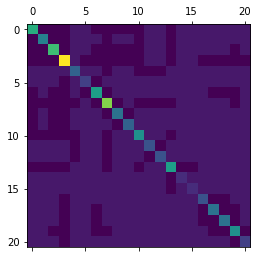

In [14]:
# Visualize the Laplacian Matrix
plt.matshow(L)
plt.show()

In [15]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)

eigenvalues:
[1.60418766e+01 1.31015347e+01 1.12640014e+01 1.03738805e+01
 8.89383805e+00 8.41490091e+00 7.66831048e+00 7.19968661e+00
 1.95815592e-15 5.55292258e+00 4.76113472e+00 4.19633999e+00
 3.79985823e+00 7.66930150e-01 2.08676139e+00 1.84377325e+00
 1.03425042e+00 6.00000000e+00 2.00000000e+00 1.00000000e+00
 4.00000000e+00]


In [16]:
# eigenvectors
print('eigenvectors:')
print(v)

eigenvectors:
[[-5.64330834e-02  9.54117363e-02 -5.55957022e-02  8.43186840e-01
  -1.70573123e-02  3.54185147e-01 -1.28313017e-01  7.21140937e-02
  -2.18217890e-01 -2.36600413e-03 -9.81526233e-02 -3.56526569e-02
  -6.30352277e-02 -2.68121496e-02  2.46336155e-01  4.33559843e-02
   2.17017762e-02  2.56683328e-18  9.09903554e-16  4.15617624e-16
   1.13479429e-16]
 [-5.81148793e-02  8.64562517e-02  1.00387529e-01 -6.62396676e-02
  -1.54673273e-01 -4.90943433e-02  5.84582420e-01 -4.21851574e-01
  -2.18217890e-01  1.97330960e-01 -3.55183354e-01 -1.76599089e-01
  -3.59217243e-01 -8.39862601e-03  2.33952622e-01  3.01456676e-02
  -1.42540365e-03 -1.20916522e-17  9.78966481e-16 -1.33911207e-16
   5.69575273e-16]
 [-5.60010958e-02  7.53558203e-02 -8.86717229e-01 -2.30639834e-01
   2.70526353e-02  2.14720223e-02  1.44089935e-02  2.06958262e-01
  -2.18217890e-01 -4.50088954e-03 -7.49822096e-02  1.34581659e-02
  -7.21570609e-02 -3.35298478e-02  2.14483753e-01  2.54912035e-02
   3.26225913e-02 -1.653

Plotting the eigen values we can see that index 8 contains the all 1's and index 13 is the second eigen vector we should try. Additionally index 14 will also be examined

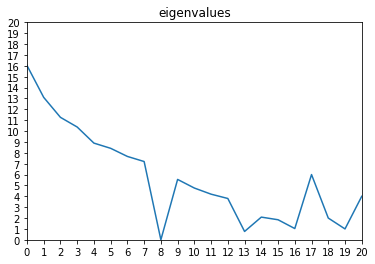

In [33]:
plt.plot(e)
plt.xlim([0, 20])  
plt.ylim([0, 20])  
plt.xticks(range(0, 21, 1))
plt.yticks(range(0, 21, 1))  
plt.title('eigenvalues')
plt.show()

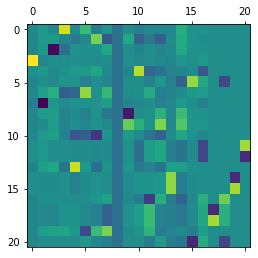

In [35]:
viz_ev = np.array(v)
plt.matshow(viz_ev)
plt.show()

In [36]:
e_v = np.array(v)
first_vector = e_v[:, 8]
print(first_vector)

second_vector = e_v[:, 13]
print(second_vector)

gpr1 = np.where(second_vector < 0)
gpr2 = np.where(second_vector > 0)

for arr in gpr2[0]:
    print(char_list[arr])

[-0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789 -0.21821789
 -0.21821789 -0.21821789 -0.21821789]
[-0.02681215 -0.00839863 -0.03352985 -0.0629621  -0.09511185 -0.12104344
 -0.08629292 -0.05066721 -0.05405768 -0.05485863 -0.02038707 -0.11822449
 -0.11822449  0.15040778  0.64533349  0.64533349 -0.13280159 -0.11679656
 -0.11679656 -0.09555482 -0.1285547 ]
HAN
GREEDO
JABBA


![title](img/graph_sw_ep4.png)

In [37]:
size = len(e)

S = np.full((size, size), 0.0)

for i in range(size):
    for ii in range(size):
        x = second_vector[i]**2
        y = second_vector[ii]**2
        S[i][ii] =  x - y

Here we can See that both Jabba and Greedo and the most dissimilar from the other characters.

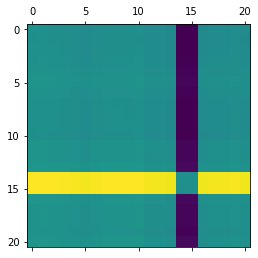

In [38]:
plt.matshow(S)
plt.show()

In [43]:
thrid_vector = e_v[:, 14]
print(thrid_vector)

gpr1 = np.where(thrid_vector < 0)
gpr2 = np.where(thrid_vector > 0)

for arr in gpr2[0]:
    print(char_list[arr])

[ 0.24633615  0.23395262  0.21448375  0.05185797 -0.07151171 -0.34212375
 -0.02217484  0.08922577  0.36387513  0.45815143  0.18229492 -0.20416982
 -0.20416982  0.13131387 -0.12083046 -0.12083046 -0.33011648 -0.17666654
 -0.17666654 -0.0375719  -0.16465927]
R2-D2
CHEWBACCA
C-3PO
LUKE
LEIA
BERU
OWEN
OBI-WAN
HAN


![title](img/graph_sw_ep4_pred.png)